In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import random

In [2]:
pi_img=cv2.imread('pi_image.png', cv2.IMREAD_GRAYSCALE)

In [3]:
pi_img.shape

(50, 50)

In [4]:
print(pi_img)

[[30 10 40 ... 70 50 10]
 [ 0 50 80 ...  0 60 70]
 [90 80 20 ... 80 10 20]
 ...
 [40 40 10 ... 80 50  0]
 [60  0 10 ... 20 30 90]
 [80 60 40 ... 10 10 20]]


In [5]:
for i in range(50):
    print(pi_img[i]/10)

[3. 1. 4. 1. 5. 9. 2. 6. 5. 3. 5. 8. 9. 7. 9. 3. 2. 3. 8. 4. 6. 2. 6. 4.
 3. 3. 8. 3. 2. 7. 9. 5. 0. 2. 8. 8. 4. 1. 9. 7. 1. 6. 9. 3. 9. 9. 3. 7.
 5. 1.]
[0. 5. 8. 2. 0. 9. 7. 4. 9. 4. 4. 5. 9. 2. 3. 0. 7. 8. 1. 6. 4. 0. 6. 2.
 8. 6. 2. 0. 8. 9. 9. 8. 6. 2. 8. 0. 3. 4. 8. 2. 5. 3. 4. 2. 1. 1. 7. 0.
 6. 7.]
[9. 8. 2. 1. 4. 8. 0. 8. 6. 5. 1. 3. 2. 8. 2. 3. 0. 6. 6. 4. 7. 0. 9. 3.
 8. 4. 4. 6. 0. 9. 5. 5. 0. 5. 8. 2. 2. 3. 1. 7. 2. 5. 3. 5. 9. 4. 0. 8.
 1. 2.]
[8. 4. 8. 1. 1. 1. 7. 4. 5. 0. 2. 8. 4. 1. 0. 2. 7. 0. 1. 9. 3. 8. 5. 2.
 1. 1. 0. 5. 5. 5. 9. 6. 4. 4. 6. 2. 2. 9. 4. 8. 9. 5. 4. 9. 3. 0. 3. 8.
 1. 9.]
[6. 4. 4. 2. 8. 8. 1. 0. 9. 7. 5. 6. 6. 5. 9. 3. 3. 4. 4. 6. 1. 2. 8. 4.
 7. 5. 6. 4. 8. 2. 3. 3. 7. 8. 6. 7. 8. 3. 1. 6. 5. 2. 7. 1. 2. 0. 1. 9.
 0. 9.]
[1. 4. 5. 6. 4. 8. 5. 6. 6. 9. 2. 3. 4. 6. 0. 3. 4. 8. 6. 1. 0. 4. 5. 4.
 3. 2. 6. 6. 4. 8. 2. 1. 3. 3. 9. 3. 6. 0. 7. 2. 6. 0. 2. 4. 9. 1. 4. 1.
 2. 7.]
[3. 7. 2. 4. 5. 8. 7. 0. 0. 6. 6. 0. 6. 3. 1. 5. 5. 8. 8. 1. 7. 4. 8. 8.
 1.

In [6]:
idx = np.argwhere(pi_img == 255)
print((idx[:, 0] * 50) + (idx[:, 1] + 1))

[ 399  932 1785 2116]


In [7]:
digits = np.array([0, 8, 3, 9])
filter_arr=np.floor(digits*np.pi*10)
filter_arr = np.array(sorted(filter_arr, reverse=True), dtype=int)
filter_2 = np.array(filter_arr).reshape(2, 2)
print(filter_2)

[[282 251]
 [ 94   0]]


In [8]:
picasso=cv2.imread('artwork_picasso.png', cv2.IMREAD_GRAYSCALE)

In [9]:
new_matrix_xor=np.zeros((100,100))
for i in range(100):
    for j in range(100):
        if i%2==0:
            if j%2==0:
                new_matrix_xor[i,j]= picasso[i,j] ^ filter_arr[0]
            else:
                new_matrix_xor[i,j]= picasso[i,j] ^ filter_arr[1]
        else:
            if j%2==0:
                new_matrix_xor[i,j]= picasso[i,j] ^ filter_arr[2]
            else:
                new_matrix_xor[i,j]= picasso[i,j] ^ filter_arr[3]
cv2.imwrite("xor_filter_artwork.png", new_matrix_xor)

True

In [10]:
def sum_of_squared_differences(image, template):
    I = image.astype(np.float32)
    T = template.astype(np.float32)

    H, W = I.shape
    h, w = T.shape

    R = np.full((H, W), np.inf, dtype=np.float32)  # Initialize with high values

    # Slide template over image
    for i in range(W - w + 1):
        for j in range(H - h + 1):
            patch = I[j:j+h, i:i+w]  # Extract sub-image
            diff = patch - T
            R[j, i] = np.dot(diff.ravel(), diff.ravel())  # Compute SSD

    return R

# Function to perform template matching
def template_matching(image, template):
    R = sum_of_squared_differences(image, template)

    # Find minimum SSD location (equivalent to cv2.minMaxLoc on -R)
    min_val = np.inf
    top_left = (0, 0)

    for i in range(R.shape[1]):  # Width
        for j in range(R.shape[0]):  # Height
            if R[j, i] < min_val:
                min_val = R[j, i]
                top_left = (i, j)

    # Define bottom-right corner of the matched region
    h, w = template.shape
    bottom_right = (top_left[0] + w, top_left[1] + h)

    return R, top_left, bottom_right

def plot_image(map_puzzle,top_left,bottom_right):
  final_result = cv2.cvtColor(map_puzzle, cv2.COLOR_RGB2BGR)
  cv2.rectangle(final_result, top_left, bottom_right, (0,255,0),3)
  return final_result

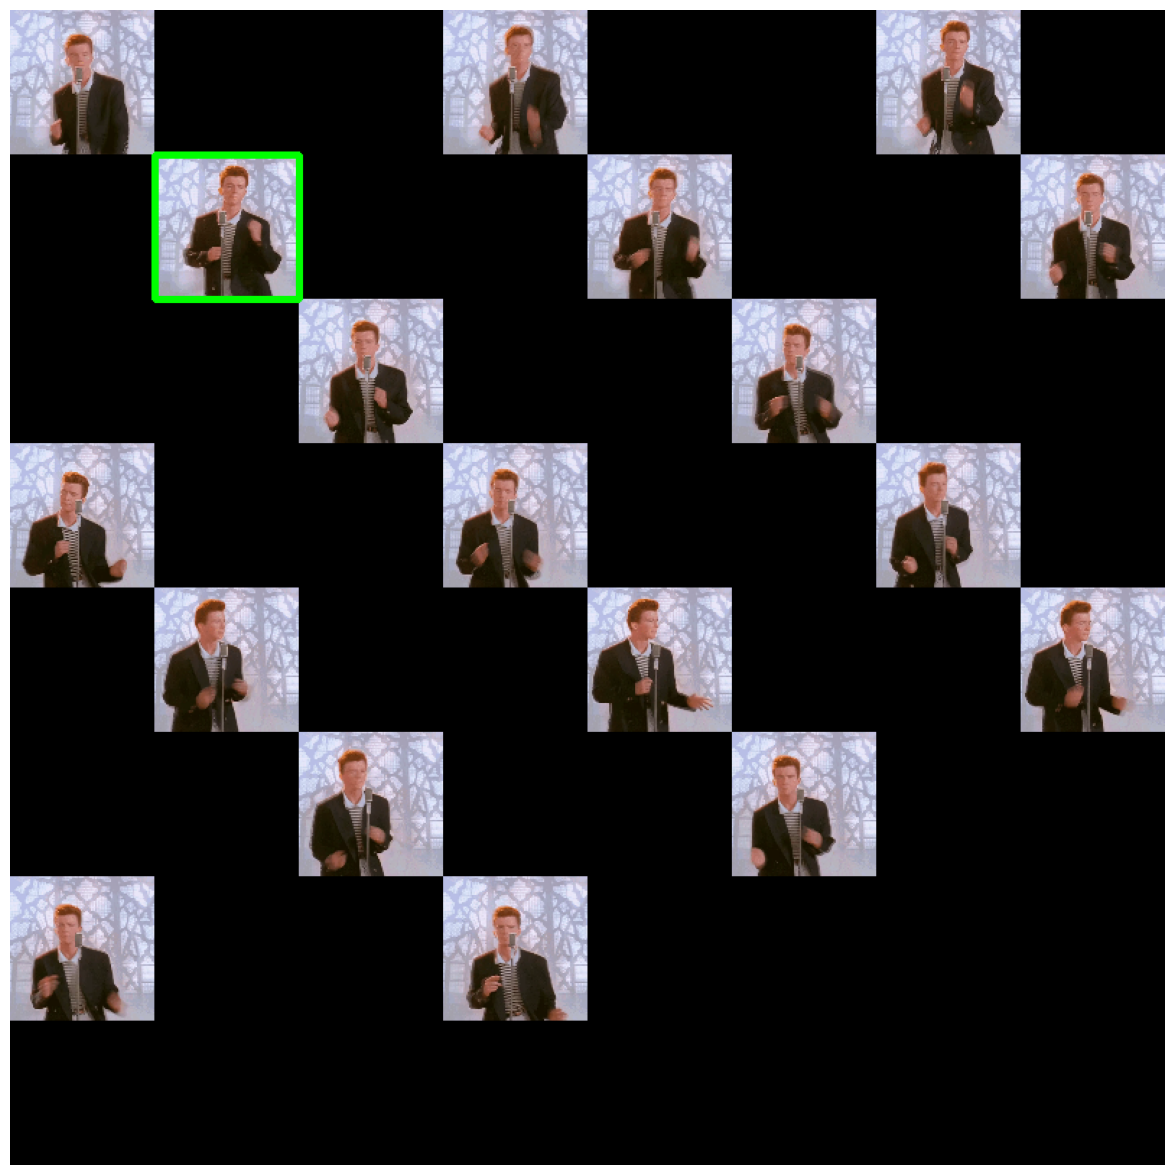

In [12]:
collage = cv2.imread('collage.png')
collage_grey = cv2.cvtColor(collage.copy(), cv2.COLOR_BGR2GRAY)
template = cv2.imread('output_xor.png', cv2.IMREAD_GRAYSCALE)
R,  top_left,bottom_right = template_matching(collage_grey,template)
result = plot_image(collage,top_left,bottom_right)
plt.figure(figsize = (15, 15))
plt.axis('off')
plt.imshow(result)

In [13]:
password=np.floor(np.sum(top_left)*np.pi)
password

628.0

In [14]:
class Node:
    def __init__(self, point, parent=None):
        self.point = point
        self.parent = parent

In [15]:
def distance(p1, p2):
    return np.linalg.norm(np.array(p1) - np.array(p2))

def nearest_node(tree, point):
    min_dist = float('inf') 
    nearest = None
    for node in tree:
        dist = distance(node.point, point)
        if dist < min_dist:
            min_dist = dist
            nearest = node
    return nearest

def steer(from_node, to_point, step_size):
    direction = np.array(to_point) - np.array(from_node.point)
    length = np.linalg.norm(direction)
    if length == 0:
        return from_node.point
    direction = (direction / length) * min(step_size, length)
    new_point = tuple(map(int, np.array(from_node.point) + direction))
    return new_point

def steer(from_node, to_point, step_size):
    x1, y1 = from_node.point
    x2, y2 = to_point
    dx = x2 - x1
    dy = y2 - y1
    length = (dx ** 2 + dy ** 2) ** 0.5 
    if length == 0:
        return (x1, y1)
    scale = min(step_size / length, 1)
    new_x = int(x1 + dx * scale)
    new_y = int(y1 + dy * scale)
    
    return (new_x, new_y)


def is_collision_free(img, p1, p2):
    x1, y1 = p1
    x2, y2 = p2
    x_line = np.linspace(x1, x2, num=10).astype(int)
    y_line = np.linspace(y1, y2, num=10).astype(int)
    for i in range(len(x_line)):  
        x, y = x_line[i], y_line[i]
        if img[y, x] != 255: 
            return False
    return True

def rrt_connect(img, start, goal, max_iter=5000, step_size=10):
    tree_a = [Node(start)]
    tree_b = [Node(goal)]
    
    for _ in range(max_iter):
        rand_point = (random.randint(0, img.shape[1] - 1), random.randint(0, img.shape[0] - 1))
        nearest_a = nearest_node(tree_a, rand_point)
        new_point_a = steer(nearest_a, rand_point, step_size)
        
        if is_collision_free(img, nearest_a.point, new_point_a):
            new_node_a = Node(new_point_a, nearest_a)
            tree_a.append(new_node_a)
            
            nearest_b = nearest_node(tree_b, new_point_a)
            new_point_b = steer(nearest_b, new_point_a, step_size)
            
            if is_collision_free(img, nearest_b.point, new_point_b):
                new_node_b = Node(new_point_b, nearest_b)
                tree_b.append(new_node_b)
                
                if distance(new_point_a, new_point_b) < step_size:
                    return reconstruct_path(new_node_a, new_node_b)
        
        tree_a, tree_b = tree_b, tree_a  # Swap trees for bidirectional growth
    return None

def reconstruct_path(node_a, node_b):
    path_a, path_b = [], []
    while node_a:
        path_a.append(node_a.point)
        node_a = node_a.parent
    while node_b:
        path_b.append(node_b.point)
        node_b = node_b.parent
    return path_a[::-1] + path_b

def solve(img,start,goal):
    path = rrt_connect(img, start, goal)
    if path:
        for x, y in path:
            cv2.circle(img, (x, y), radius=2, color=127, thickness=-1)  # Draw visible points
        plt.imshow(img, cmap='gray', vmin=0, vmax=255)
        plt.show()
    else:
        print('No solution found')

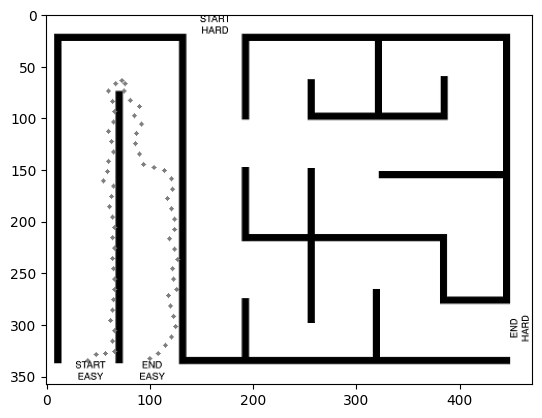

In [17]:
img = cv2.imread('maze.png', cv2.IMREAD_GRAYSCALE)
start_e, goal_e = (40, 335), (100,333)
solve(img,start_e,goal_e)

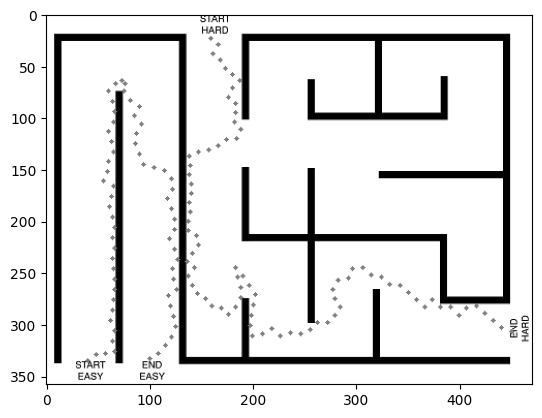

In [18]:
start_h, goal_h = (159, 23), (450,307)
solve(img,start_h,goal_h)